# Sprint10 深層学習スラクラッチ ディープニューラルネットワーク

## 1.このSprintについて
### Sprintの目的
スクラッチを通してニューラルネットワークの発展的内容を理解する

### どのように学ぶか
スクラッチで作成したニューラルネットワークの実装を拡張していきます。

## 2.ディープニューラルネットワークスクラッチ
前回は3層のニューラルネットワークを作成しましたが、今回はこれを任意の層数に拡張しやすいものに書き換えていきます。<br>
その上で、活性化関数や初期値、最適化手法について発展的なものを扱えるようにしていきます。


このようなスクラッチを行うことで、今後各種フレームワークを利用していくにあたり、内部の動きが想像できることを目指します。


名前は新しくScratchDeepNeuralNetworkClassifierクラスとしてください。

### 層などのクラス化
クラスにまとめて行くことで、構成を変更しやすい実装にしていきます。

手を加える箇所


- 層の数
- 層の種類（今後畳み込み層など他のタイプの層が登場する）
- 活性化関数の種類
- 重みやバイアスの初期化方法
- 最適化手法

そのために、全結合層、各種活性化関数、重みやバイアスの初期化、最適化手法それぞれのクラスを作成します。


実装方法は自由ですが、簡単な例を紹介します。サンプルコード1のように全結合層と活性化関数のインスタンスを作成し、サンプルコード2,3のようにして使用します。それぞれのクラスについてはこのあと解説します。

In [1]:
"""
#《サンプルコード1》
#ScratchDeepNeuralNetworkClassifierのfitメソッド内
# self.sigma : ガウス分布の標準偏差
# self.lr : 学習率
# self.n_nodes1 : 1層目のノード数
# self.n_nodes2 : 2層目のノード数
# self.n_output : 出力層のノード数
optimizer = SGD(self.lr)
self.FC1 = FC(self.n_features, self.n_nodes1, SimpleInitializer(self.sigma), optimizer)
self.activation1 = Tanh()
self.FC2 = FC(self.n_nodes1, self.n_nodes2, SimpleInitializer(self.sigma), optimizer)
self.activation2 = Tanh()
self.FC3 = FC(self.n_nodes2, self.n_output, SimpleInitializer(self.sigma), optimizer)
self.activation3 = Softmax()
"""

'\n#《サンプルコード1》\n#ScratchDeepNeuralNetworkClassifierのfitメソッド内\n# self.sigma : ガウス分布の標準偏差\n# self.lr : 学習率\n# self.n_nodes1 : 1層目のノード数\n# self.n_nodes2 : 2層目のノード数\n# self.n_output : 出力層のノード数\noptimizer = SGD(self.lr)\nself.FC1 = FC(self.n_features, self.n_nodes1, SimpleInitializer(self.sigma), optimizer)\nself.activation1 = Tanh()\nself.FC2 = FC(self.n_nodes1, self.n_nodes2, SimpleInitializer(self.sigma), optimizer)\nself.activation2 = Tanh()\nself.FC3 = FC(self.n_nodes2, self.n_output, SimpleInitializer(self.sigma), optimizer)\nself.activation3 = Softmax()\n'

In [2]:
"""
#《サンプルコード2》
#イテレーションごとのフォワード
A1 = self.FC1.forward(X)
Z1 = self.activation1.forward(A1)
A2 = self.FC2.forward(Z1)
Z2 = self.activation2.forward(A2)
A3 = self.FC3.forward(Z2)
Z3 = self.activation3.forward(A3)
"""

'\n#《サンプルコード2》\n#イテレーションごとのフォワード\nA1 = self.FC1.forward(X)\nZ1 = self.activation1.forward(A1)\nA2 = self.FC2.forward(Z1)\nZ2 = self.activation2.forward(A2)\nA3 = self.FC3.forward(Z2)\nZ3 = self.activation3.forward(A3)\n'

In [3]:
"""
#《サンプルコード3》
#イテレーションごとのバックワード
dA3 = self.activation3.backward(Z3, Y) # 交差エントロピー誤差とソフトマックスを合わせている
dZ2 = self.FC3.backward(dA3)
dA2 = self.activation2.backward(dZ2)
dZ1 = self.FC2.backward(dA2)
dA1 = self.activation1.backward(dZ1)
dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
"""

'\n#《サンプルコード3》\n#イテレーションごとのバックワード\ndA3 = self.activation3.backward(Z3, Y) # 交差エントロピー誤差とソフトマックスを合わせている\ndZ2 = self.FC3.backward(dA3)\ndA2 = self.activation2.backward(dZ2)\ndZ1 = self.FC2.backward(dA2)\ndA1 = self.activation1.backward(dZ1)\ndZ0 = self.FC1.backward(dA1) # dZ0は使用しない\n'

## 【問題1】全結合層のクラス化
全結合層のクラス化を行なってください。


以下に雛形を載せました。コンストラクタで重みやバイアスの初期化をして、あとはフォワードとバックワードのメソッドを用意します。重みW、バイアスB、およびフォワード時の入力Xをインスタンス変数として保持しておくことで、煩雑な入出力は不要になります。


なお、インスタンスも引数として渡すことができます。そのため、初期化方法のインスタンスinitializerをコンストラクタで受け取れば、それにより初期化が行われます。渡すインスタンスを変えれば、初期化方法が変えられます。


また、引数として自身のインスタンスselfを渡すこともできます。これを利用してself.optimizer.update(self)という風に層の重みの更新が可能です。更新に必要な値は複数ありますが、全て全結合層が持つインスタンス変数にすることができます。


初期化方法と最適化手法のクラスについては後述します。


## 【問題2】初期化方法のクラス化
初期化を行うコードをクラス化してください。


前述のように、全結合層のコンストラクタに初期化方法のインスタンスを渡せるようにします。以下の雛形に必要なコードを書き加えていってください。標準偏差の値（sigma）はコンストラクタで受け取るようにすることで、全結合層のクラス内にこの値（sigma）を渡さなくてすむようになります。


これまで扱ってきた初期化方法はSimpleInitializerクラスと名付けることにします。

## 【問題3】最適化手法のクラス化
最適化手法のクラス化を行なってください。


最適化手法に関しても初期化方法同様に全結合層にインスタンスとして渡します。バックワードのときにself.optimizer.update(self)のように更新できるようにします。以下の雛形に必要なコードを書き加えていってください。


これまで扱ってきた最適化手法はSGDクラス（Stochastic Gradient Descent、確率的勾配降下法）として作成します。

## 【問題4】活性化関数のクラス化
活性化関数のクラス化を行なってください。


ソフトマックス関数のバックプロパゲーションには交差エントロピー誤差の計算も含む実装を行うことで計算が簡略化されます。

### 発展的要素
活性化関数や重みの初期値、最適化手法に関してこれまで見てきた以外のものを実装していきます。

## 【問題5】ReLUクラスの作成
現在一般的に使われている活性化関数であるReLU（Rectified Linear Unit）をReLUクラスとして実装してください。


ReLUは以下の数式です。

$$
f(x) = ReLU(x) = \begin{cases}
x  & \text{if $x>0$,}\\
0 & \text{if $x\leqq0$.}
\end{cases}
$$

$x$ : ある特徴量。スカラー


実装上はnp.maximumを使い配列に対してまとめて計算が可能です。


numpy.maximum — NumPy v1.15 Manual


一方、バックプロパゲーションのための $x$ に関する $f(x)$ の微分は以下のようになります。

$$
\frac{\partial f(x)}{\partial x} = \begin{cases}
1  & \text{if $x>0$,}\\
0 & \text{if $x\leqq0$.}
\end{cases}
$$

数学的には微分可能ではないですが、 $x=0$ のとき $0$ とすることで対応しています。


フォワード時の $x$ の正負により、勾配を逆伝播するかどうかが決まるということになります。

## 【問題6】重みの初期値
ここまでは重みやバイアスの初期値は単純にガウス分布で、標準偏差をハイパーパラメータとして扱ってきました。しかし、どのような値にすると良いかが知られています。シグモイド関数やハイパボリックタンジェント関数のときは Xavierの初期値 （またはGlorotの初期値）、ReLUのときは Heの初期値 が使われます。


XavierInitializerクラスと、HeInitializerクラスを作成してください。

### Xavierの初期値
Xavierの初期値における標準偏差 $\sigma$ は次の式で求められます。

$$
\sigma = \frac{1}{\sqrt{n}}
$$

$n$ : 前の層のノード数


《論文》

Glorot, X., & Bengio, Y. (n.d.). Understanding the difficulty of training deep feedforward neural networks.
http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf

### Heの初期値
Heの初期値における標準偏差 $\sigma$ は次の式で求められます。

$$
\sigma = \sqrt{\frac{2}{n}}
$$

$n$ : 前の層のノード数


《論文》

He, K., Zhang, X., Ren, S., & Sun, J. (2015). Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification.
https://arxiv.org/pdf/1502.01852.pdf

## 【問題7】最適化手法
学習率は学習過程で変化させていく方法が一般的です。基本的な手法である AdaGrad のクラスを作成してください。


まず、これまで使ってきたSGDを確認します。

$$
W_i^{\prime} = W_i - \alpha E(\frac{\partial L}{\partial W_i}) \\
B_i^{\prime} = B_i - \alpha E(\frac{\partial L}{\partial B_i})
$$

$\alpha$ : 学習率（層ごとに変えることも可能だが、基本的には全て同じとする）


$\frac{\partial L}{\partial W_i}$ : $W_i$ に関する損失 $L$ の勾配


$\frac{\partial L}{\partial B_i}$ : $B_i$ に関する損失 $L$ の勾配


$E()$ : ミニバッチ方向にベクトルの平均を計算


続いて、AdaGradです。バイアスの数式は省略しますが、重みと同様のことをします。


更新された分だけその重みに対する学習率を徐々に下げていきます。イテレーションごとの勾配の二乗和 $H$ を保存しておき、その分だけ学習率を小さくします。


学習率は重み一つひとつに対して異なることになります。

$$
H_i^{\prime}  = H_i+E(\frac{\partial L}{\partial W_i})×E(\frac{\partial L}{\partial W_i})\\
W_i^{\prime} = W_i - \alpha \frac{1}{\sqrt{H_i^{\prime} }} E(\frac{\partial L}{\partial W_i}) \\
$$

$H_i$ : i層目に関して、前のイテレーションまでの勾配の二乗和（初期値は0）


$H_i^{\prime}$ : 更新した $H_i$


《論文》
Duchi JDUCHI, J., & Singer, Y. (2011). Adaptive Subgradient Methods for Online Learning and Stochastic Optimization * Elad Hazan. Journal of Machine Learning Research (Vol. 12).
https://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf

## 【問題8】クラスの完成
任意の構成で学習と推定が行えるScratchDeepNeuralNetworkClassifierクラスを完成させてください。

## 3.検証
## 【問題9】学習と推定
層の数や活性化関数を変えたいくつかのネットワークを作成してください。そして、MNISTのデータを学習・推定し、Accuracyを計算してください。

### 【用語確認】
#### 全結合層
> 全結合層とは、その名の通り前層と後層のニューロンが全て接続されている層のことを言います。
> 様々な呼び方
> Fully Connected Layer
> FC Layer
> FC層
> Affine Layer (アフィン空間、アフィン写像から由来)
> Dense Layer (kerasなどで使われる)

 ### 以下実装

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 【問題1】全結合層のクラス化

In [5]:
#Full Connected Layer Class
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
        
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.w = initializer.W(n_nodes1, n_nodes2)
        self.b = initializer.B(n_nodes2)
        
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """ 
        self.X = X
        A = np.dot(self.X, self.w) + self.b
        
        return A
    
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        self.dW = np.dot(self.X.T, dA)
        self.dB = np.sum(dA, axis=0)
        self.dZ = np.dot(dA, self.w.T)
        
        # 更新
        self = self.optimizer.update(self)
        
        return self.dZ

## 【問題2】初期化方法のクラス化

In [6]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        
        return W
    
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        B = self.sigma * np.random.randn(n_nodes2)
        
        return B

## 【問題３】最適化方法のクラス化

In [7]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        layer.w -= self.lr*layer.dW
        layer.b -= self.lr*layer.dB
        
        return layer

## 【問題4】活性化関数のクラス化

In [8]:
class Sigmoid:
    def __init__(self):
        pass
    
    def forward(self, A):
        self.Z = 1/(1+np.exp(-A)) 
        return self.Z
    
    def backward(self, dZ):
        dA = dZ * (1 - self.Z) * self.Z
        return dA

In [9]:
class Tanh:
    def __init__(self):
        pass
    
    def forward(self, A):
        
        self.Z = np.tanh(A)
        return self.Z
    
    def backward(self, dZ):
        dA = dZ * (1 - self.Z**2)    #tanh関数の微分
        return dA

In [10]:
class Softmax:
    def __init__(self):
        pass
    
    def forward(self, A):
        self.Z = np.exp(A)/np.sum(np.exp(A), axis=1, keepdims=True)
        return self.Z
    
    def backward(self, ty):
        dA = self.Z - ty
        return dA

## 【問題5】ReLUクラスの作成

In [11]:
class ReLU:
    def __init__(self):
        pass
    
    def forward(self, A):
        self.Z = np.maximum(A, 0)
        return self.Z
    
    def backward(self,dZ):
        dA = np.where(self.Z > 0, dZ, 0)
        return dA

## 【問題6】重みの初期値

In [12]:
class XavierInitializer:
    def W(self, n_nodes1, n_nodes2):
        self.sigma = 1/np.sqrt(n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(n_nodes2)
        return B

In [13]:
class HeInitializer:
    def W(self, n_nodes1, n_nodes2):
        self.sigma = np.sqrt(2/n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(n_nodes2)
        return B

## 【問題7】最適化手法
最適化手法には様々なものがあります。発展的なものの中でも比較的実装が簡単なAdaGradを実装してみましょう。

In [14]:
class AdaGrad:
    """
    AdaGrad
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr, hw, hb):
        self.lr = lr
        self.hw = hw
        self.hb = hb
        
    def update(self, layer):
        self.hw = layer.dW**2 + self.hw
        layer.w -= self.lr * np.sqrt(self.hw) * layer.dW
        
        self.hb = layer.dB**2 + self.hb
        layer.b -= self.lr * np.sqrt(self.hb) *  layer.dB
        
        return layer

## 【問題8】クラスの完成
モデル全体を設計するクラスを完成させてください。

In [15]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [157]:
class ScratchDeepNeuralNetrowkClassifier:
    def __init__(self, lr=0.01 ,sigma=0.01, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10):
        self.lr = lr     # 学習係数
        self.sigma = sigma    # 重みとバイアスの広がり具合
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        
    
    def fit(self, X, y, epoch, batch_size=20):
        
        self.loss = np.zeros(epoch)
        # インスタンス生成---------------------------------------------------
#         optimizer = SGD(self.lr)    #optimizer=最適化

        optimizer1 = AdaGrad(self.lr, 0, 0)
        optimizer2 = AdaGrad(self.lr, 0, 0)
        optimizer3 = AdaGrad(self.lr, 0, 0)
        
        #初期値はsimple or xavi or He
#         self.FC1 = FC(self.n_features, self.n_nodes1, SimpleInitializer(self.sigma), optimizer)    # FC=全結合層
#         self.FC2 = FC(self.n_nodes1, self.n_nodes2, SimpleInitializer(self.sigma), optimizer)
#         self.FC3 = FC(self.n_nodes2, self.n_output, SimpleInitializer(self.sigma), optimizer)

        self.FC1 = FC(self.n_features, self.n_nodes1, SimpleInitializer(self.sigma), optimizer1)    # FC=全結合層
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, SimpleInitializer(self.sigma), optimizer2)
        self.FC3 = FC(self.n_nodes2, self.n_output, SimpleInitializer(self.sigma), optimizer3)

#         self.FC1 = FC(self.n_features, self.n_nodes1, XavierInitializer(), optimizer)
#         self.FC2 = FC(self.n_nodes1, self.n_nodes2, XavierInitializer(), optimizer)
#         self.FC3 = FC(self.n_nodes2, self.n_output, XavierInitializer(), optimizer)
        
#         self.FC1 = FC(self.n_features, self.n_nodes1, HeInitializer(), optimizer)
#         self.FC2 = FC(self.n_nodes1, self.n_nodes2, HeInitializer(), optimizer)
#         self.FC3 = FC(self.n_nodes2, self.n_output, HeInitializer(), optimizer)
        
        
        self.activation1 = Tanh()    #activation=活性化
        self.activation2 = Tanh()
        
#         self.activation1 = Sigmoid()
#         self.activation2 = Sigmoid()
        
#         self.activation1 = ReLU()
#         self.activation2 = ReLU()
        
        self.activation3 = Softmax()
        
        # one-hotエンコーディング
        enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
        y_onehot = enc.fit_transform(y[:, np.newaxis])
        
        for i in range(epoch):    
            get_mini_batch = GetMiniBatch(X, y_onehot, batch_size)    # ミニバッチ生成
            for mini_X_train, mini_y_train in get_mini_batch:    # ミニバッチ学習則
                
                A1 = self.FC1.forward(mini_X_train)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)

                """
                Loss Curvを描くための処理
                """
                
                dA3 = self.activation3.backward(mini_y_train) # 交差エントロピー誤差とソフトマックスを合わせている
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
                
                
            yp = self.predict(X)
            # 損失関数
            self.loss[i] = -np.sum(y_onehot * np.log(self.predict_y))/ self.predict_y.shape[1]
            
    def predict(self,X):
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        y = self.activation3.forward(A3)
        self.predict_y = y.copy()
        
        return np.argsort(y)[:,-1]

In [60]:
np.set_printoptions(precision=8)    # 小数点以下出力桁数
np.set_printoptions(suppress=True)    #指数表示禁止
# 《データセットをダウンロードするコード》
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 平滑化
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
# 前処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
# 分割
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

Using TensorFlow backend.
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

(48000, 784)
(12000, 784)


## 【問題9】学習と推定

In [89]:
scDNN_1 = ScratchDeepNeuralNetrowkClassifier()
scDNN_1.fit(X_train, y_train, epoch=10)

self.loss[i] 1034.2387093559946
self.loss[i] 586.4240042343138
self.loss[i] 408.21121092052795
self.loss[i] 301.0240330238702
self.loss[i] 239.72939460854292
self.loss[i] 196.88980373096084
self.loss[i] 141.84776854531404
self.loss[i] 106.4866120977113
self.loss[i] 110.14397561028719
self.loss[i] 74.28618136706473


In [90]:
yp_train1 = scDNN_1.predict(X_train)

In [91]:
yp_train1

array([1, 1, 6, ..., 7, 7, 4])

In [92]:
# 正解率
from sklearn.metrics import accuracy_score
accuracy_score(y_train, yp_train1)

0.9952916666666667

In [93]:
scDNN_1.loss

array([1034.23870936,  586.42400423,  408.21121092,  301.02403302,
        239.72939461,  196.88980373,  141.84776855,  106.4866121 ,
        110.14397561,   74.28618137])

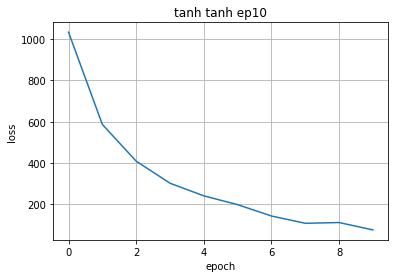

In [94]:
# 折れ線グラフを出力
trans_x = np.array(range(len(scDNN_1.loss)))
plt.title("tanh tanh ep10")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(trans_x, scDNN_1.loss)
plt.grid(True)
plt.show()

In [105]:
# sigmoid sigmoid
scDNN_ss = ScratchDeepNeuralNetrowkClassifier()
scDNN_ss.fit(X_train, y_train, epoch=10)
yp_train_ss = scDNN_ss.predict(X_train)

In [106]:
# 正解率
accuracy_score(y_train, yp_train_ss)

0.972125

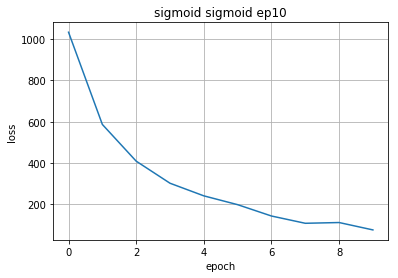

In [107]:
# 折れ線グラフを出力
trans_x = np.array(range(len(scDNN_ss.loss)))
plt.title("sigmoid sigmoid ep10")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(trans_x, scDNN_1.loss)
plt.grid(True)
plt.show()

In [119]:
# ReLU ReLU
scDNN_rr = ScratchDeepNeuralNetrowkClassifier()
scDNN_rr.fit(X_train, y_train, epoch=10)
yp_train_rr = scDNN_rr.predict(X_train)

In [120]:
# 正解率
accuracy_score(y_train, yp_train_rr)

0.9906875

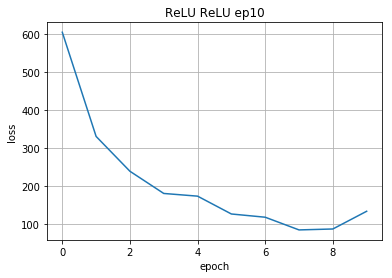

In [121]:
# 折れ線グラフを出力
trans_x = np.array(range(len(scDNN_rr.loss)))
plt.title("ReLU ReLU ep10")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(trans_x, scDNN_rr.loss)
plt.grid(True)
plt.show()

In [128]:
# tanh tanh Xavier
scDNN_tt_x = ScratchDeepNeuralNetrowkClassifier()
scDNN_tt_x.fit(X_train, y_train, epoch=10)
yp_train_tt_x = scDNN_tt_x.predict(X_train)

In [129]:
# 正解率
accuracy_score(y_train, yp_train_tt_x)

0.9995416666666667

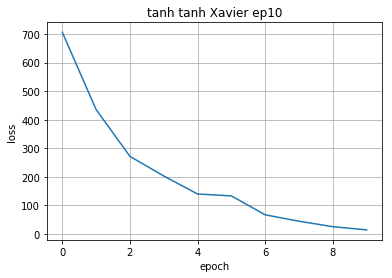

In [130]:
# 折れ線グラフを出力
trans_x = np.array(range(len(scDNN_tt_x.loss)))
plt.title("tanh tanh Xavier ep10")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(trans_x, scDNN_tt_x.loss)
plt.grid(True)
plt.show()

In [132]:
# sigmoid sigmoid Xavier
scDNN_ss_x = ScratchDeepNeuralNetrowkClassifier()
scDNN_ss_x.fit(X_train, y_train, epoch=10)
yp_train_ss_x = scDNN_ss_x.predict(X_train)

In [133]:
# 正解率
accuracy_score(y_train, yp_train_ss_x)

0.9829583333333334

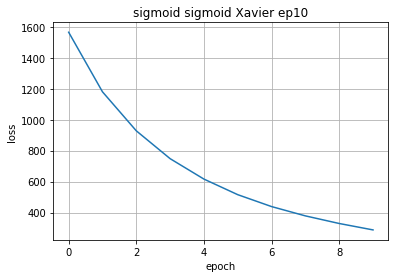

In [134]:
# 折れ線グラフを出力
trans_x = np.array(range(len(scDNN_ss_x.loss)))
plt.title("sigmoid sigmoid Xavier ep10")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(trans_x, scDNN_ss_x.loss)
plt.grid(True)
plt.show()

In [137]:
# ReLU ReLU He
scDNN_rr_he = ScratchDeepNeuralNetrowkClassifier()
scDNN_rr_he.fit(X_train, y_train, epoch=10)
yp_train_rr_he = scDNN_rr_he.predict(X_train)

In [138]:
# 正解率
accuracy_score(y_train, yp_train_rr_he)

0.9959375

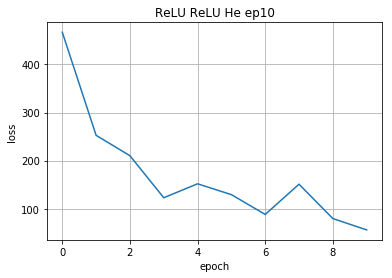

In [139]:
# 折れ線グラフを出力
trans_x = np.array(range(len(scDNN_rr_he.loss)))
plt.title("ReLU ReLU He ep10")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(trans_x, scDNN_rr_he.loss)
plt.grid(True)
plt.show()

【考察】<br>
tanhと正規分布より、tanhとXavier<br>
sigmoidと正規分布より、sigmoidとXavier<br>
ReLUと正規分布より、ReLUとHe<br>
でそれぞれ正解率が0.2前後上昇した。

In [179]:
# tanh tanh 正規分布 AdaGrad
scDNN_tt_ada = ScratchDeepNeuralNetrowkClassifier(lr=1e-5)
scDNN_tt_ada.fit(X_train, y_train, epoch=30)
yp_train_tt_ada = scDNN_tt_ada.predict(X_train)

In [180]:
# 正解率
accuracy_score(y_train, yp_train_tt_ada)

0.9639791666666667

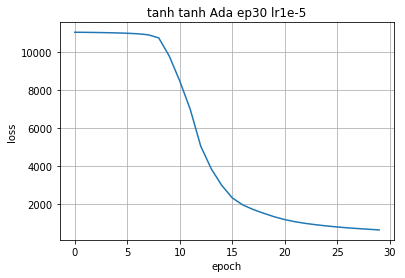

In [182]:
# 折れ線グラフを出力
trans_x = np.array(range(len(scDNN_tt_ada.loss)))
plt.title("tanh tanh Ada ep30 lr1e-5")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(trans_x, scDNN_tt_ada.loss)
plt.grid(True)
plt.show()

In [185]:
# tanh tanh 正規分布 AdaGrad
scDNN_tt_ada_2 = ScratchDeepNeuralNetrowkClassifier(lr=1e-4)
scDNN_tt_ada_2.fit(X_train, y_train, epoch=20)
yp_train_tt_ada_2 = scDNN_tt_ada_2.predict(X_train)

In [186]:
# 正解率
accuracy_score(y_train, yp_train_tt_ada_2)

0.9795625

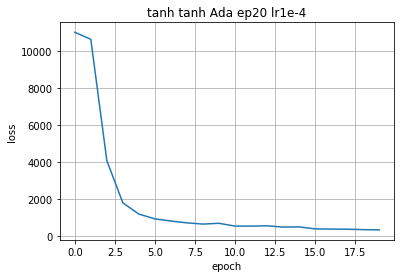

In [187]:
# 折れ線グラフを出力
trans_x = np.array(range(len(scDNN_tt_ada_2.loss)))
plt.title("tanh tanh Ada ep20 lr1e-4")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(trans_x, scDNN_tt_ada_2.loss)
plt.grid(True)
plt.show()

【考察】 AdaGradはSGDより学習率を下げる必要があった。学習率0.1ではオーバーフローが発生した。

## 【問題8】クラスの完成
任意の構成で学習と推定が行えるScratchDeepNeuralNetworkClassifierクラスへ変更

In [111]:
class ScratchDeepNeuralNetrowkClassifier2:
    def __init__(self, nodes_list, lr=0.01 ,sigma=0.01, n_features=784):
        self.lr = lr     # 学習係数
        self.sigma = sigma    # 重みとバイアスの広がり具合
        self.n_features = n_features
        self.nodes_list = nodes_list
    
    def fit(self, X, y, Initializer, activations, opt="SGD", epoch=1, batch_size=20):
        
        self.loss = np.zeros(epoch)
        self.activation_list = []
        self.FC_list = []
        self.nodes_list.insert(0, self.n_features)
        
        # インスタンス生成---------------------------------------------------
        for i in range(len(self.nodes_list)-1):
            # 初期値----------------------------------------
            if Initializer[i] == "Simple":
                initializ = SimpleInitializer(self.sigma)
            elif Initializer[i] == "Xavier":
                initializ = XavierInitializer()
            else:
                initializ = HeInitializer()
            # 最適化手法-----------------------------------
            if opt == "SGD":
                optimizer = SGD(self.lr)
            else:
                optimizer = AdaGrad(self.lr, 0, 0)
            # 全結合層インスタンス生成-------------------
            self.FC_list.append(FC(self.nodes_list[i], self.nodes_list[i+1], initializ, optimizer))
            
            # 活性化関数インスタンス生成----------------
            if i < len(self.nodes_list)-2:
                if activations[i] == "tanh":
                    self.activation_list.append(Tanh() )
                elif activations[i] == "sigmoid":
                    self.activation_list.append(Sigmoid() )
                else:
                    self.activation_list.append(ReLU() )
            else:
                self.activation_list.append(Softmax() )
        # -----------------------------------------------------------------end
        
        # one-hotエンコーディング
        enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
        y_onehot = enc.fit_transform(y[:, np.newaxis])
        
        for i in range(epoch):
            get_mini_batch = GetMiniBatch(X, y_onehot, batch_size)    # ミニバッチ生成
            for mini_X_train, mini_y_train in get_mini_batch:    # ミニバッチ学習則
                
                A = self.FC_list[0].forward(mini_X_train)    # 入力層
                Z = self.activation_list[0].forward(A)
                
                for j in range(1, len(self.nodes_list)-1):    # 中間層&出力層
                    A = self.FC_list[j].forward(Z)
                    Z = self.activation_list[j].forward(A)
                
                dA = self.activation_list[-1].backward(mini_y_train) # 出力層
                dZ = self.FC_list[-1].backward(dA)
                
                for j in reversed(range(1, len(self.nodes_list)-2)):    # 中間層
                    dA = self.activation_list[j].backward(dZ)
                    dZ = self.FC_list[j].backward(dA)
                    
                dA = self.activation_list[0].backward(dZ)    # 入力層
                dZ = self.FC_list[0].backward(dA)
                
                
            yp = self.predict(X)
            # 損失関数
            self.loss[i] = -np.sum(y_onehot * np.log(self.predict_y))/ self.predict_y.shape[1]
            
    def predict(self,X):
        A = self.FC_list[0].forward(X)    # 入力層
        Z = self.activation_list[0].forward(A)
                
        for j in range(1, len(self.nodes_list)-1):    # 中間層&出力層
            A = self.FC_list[j].forward(Z)
            Z = self.activation_list[j].forward(A)
            
        self.predict_y = Z.copy()
        
        return np.argsort(Z)[:,-1]

#### 選択要素
- 層:nodes_list
- 初期値:Initializer = Simple,Xavier,He
- 最適化手法:opt = SGD, AdaGrad
- 活性化関数:activations = tanh, sigmoid, ReLU

In [112]:
scDNN2_test = ScratchDeepNeuralNetrowkClassifier2(nodes_list=[400, 200, 10])

In [113]:
scDNN2_test.fit(X_train, y_train, Initializer=["Xavier", "Xavier", "Xavier"], activations=["tanh", "tanh"],
                opt="SGD", epoch=10, batch_size=20)
yp_train_test = scDNN2_test.predict(X_train)

In [114]:
# 正解率
from sklearn.metrics import accuracy_score
accuracy_score(y_train, yp_train_test)

0.999375

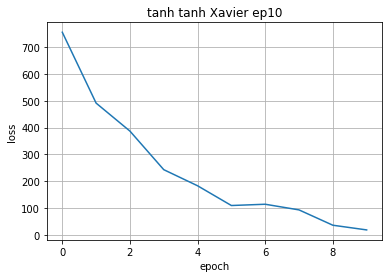

In [115]:
# 折れ線グラフを出力
trans_x = np.array(range(len(scDNN2_test.loss)))
plt.title("tanh tanh Xavier ep10")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(trans_x, scDNN2_test.loss)
plt.grid(True)
plt.show()

In [116]:
scDNN2_tts = ScratchDeepNeuralNetrowkClassifier2(nodes_list=[400, 200, 100, 10])
scDNN2_tts.fit(X_train, y_train, Initializer=["Xavier", "Xavier", "Xavier", "Xavier"],
               activations=["tanh", "tanh","sigmoid"],
                opt="SGD", epoch=10, batch_size=20)
yp_train_tts = scDNN2_tts.predict(X_train)

In [117]:
# 正解率
accuracy_score(y_train, yp_train_tts)

0.9986666666666667

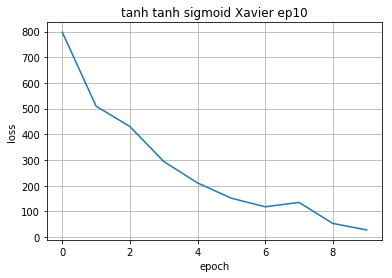

In [118]:
# 折れ線グラフを出力
trans_x = np.array(range(len(scDNN2_tts.loss)))
plt.title("tanh tanh sigmoid Xavier ep10")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(trans_x, scDNN2_tts.loss)
plt.grid(True)
plt.show()

In [131]:
scDNN2_ttsr = ScratchDeepNeuralNetrowkClassifier2(nodes_list=[400, 200, 100, 10])
scDNN2_ttsr.fit(X_train, y_train, Initializer=["Xavier", "Xavier", "Xavier", "He", "Xavier"],
               activations=["tanh", "tanh","sigmoid", "ReLU"],
                opt="SGD", epoch=10, batch_size=20)
yp_val_ttsr = scDNN2_ttsr.predict(X_val)

In [133]:
# 正解率
accuracy_score(y_val, yp_val_ttsr)

0.9805833333333334

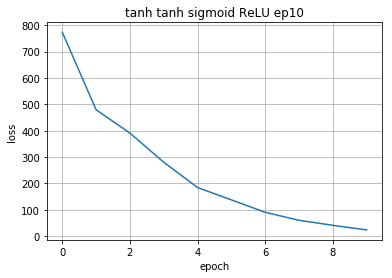

In [134]:
# 折れ線グラフを出力
trans_x = np.array(range(len(scDNN2_ttsr.loss)))
plt.title("tanh tanh sigmoid ReLU ep10")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(trans_x, scDNN2_ttsr.loss)
plt.grid(True)
plt.show()

In [128]:
scDNN2_ttsrt = ScratchDeepNeuralNetrowkClassifier2(nodes_list=[400, 200, 200, 100, 10])
scDNN2_ttsrt.fit(X_train, y_train, Initializer=["Xavier", "Xavier", "Xavier", "He", "Xavier", "Xavier"],
               activations=["tanh", "tanh","sigmoid", "ReLU", "tanh"],
                opt="SGD", epoch=10, batch_size=20)
yp_val_ttsrt = scDNN2_ttsrt.predict(X_val)

In [129]:
# 正解率
accuracy_score(y_val, yp_val_ttsrt)

0.9761666666666666

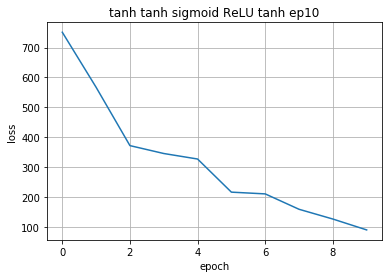

In [130]:
# 折れ線グラフを出力
trans_x = np.array(range(len(scDNN2_ttsrt.loss)))
plt.title("tanh tanh sigmoid ReLU tanh ep10")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(trans_x, scDNN2_ttsrt.loss)
plt.grid(True)
plt.show()

In [136]:
scDNN2_ttsr_20 = ScratchDeepNeuralNetrowkClassifier2(nodes_list=[400, 200, 100, 10])
scDNN2_ttsr.fit(X_train, y_train, Initializer=["Xavier", "Xavier", "Xavier", "He", "Xavier"],
               activations=["tanh", "tanh","sigmoid", "ReLU"],
                opt="SGD", epoch=20, batch_size=20)
yp_val_ttsr = scDNN2_ttsr.predict(X_val)

In [137]:
# 正解率
accuracy_score(y_val, yp_val_ttsr)

0.9815

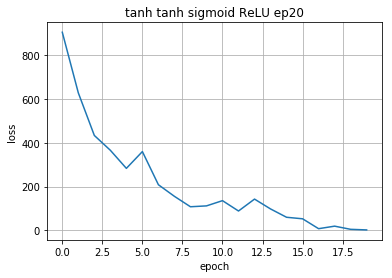

In [138]:
# 折れ線グラフを出力
trans_x = np.array(range(len(scDNN2_ttsr.loss)))
plt.title("tanh tanh sigmoid ReLU ep20")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(trans_x, scDNN2_ttsr.loss)
plt.grid(True)
plt.show()

【考察】層を重ねれば精度も上がるという訳ではないが、組み合わせを調整することで、99.8％の正解率を出すことが出来た。

In [139]:
"""
誤分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証データの正解ラベル(n_samples,)
X_val : 検証データの特徴量（n_samples, n_features)
"""
def miss_pred(y_pred, y_val):
    num = 36 # いくつ表示するか
    true_false = y_pred==y_val
    false_list = np.where(true_false==False)[0].astype(np.int)
    print("誤分類数　：　", false_list.shape[0])
    if false_list.shape[0] < num:
        num = false_list.shape[0]
    fig = plt.figure(figsize=(6, 6))
    fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
    for i in range(num):
        ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
        ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
        ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

誤分類数　：　 222


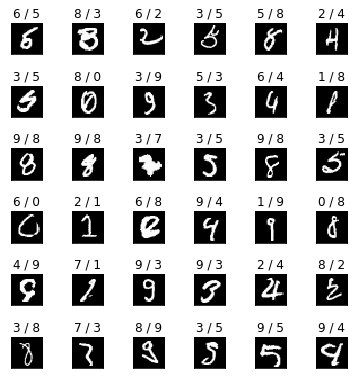

In [140]:
miss_pred(yp_val_ttsr, y_val)